In [1]:
#importing cleaned and preprocessed data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

cali = pd.read_csv('california-housing-data.csv')
cali_cleaned = cali[cali.ocean_proximity != 'ISLAND'].dropna()
cali_cleaned['household_average'] = round(cali_cleaned['population']/cali_cleaned['households'], 0)
apartments = cali_cleaned[ (cali_cleaned['household_average'] >= 10)].index
cali_cleaned.drop(apartments , inplace=True)
dummies = pd.get_dummies(cali_cleaned.ocean_proximity)
cali_cleaned = cali_cleaned.assign(zmedianincome = lambda x : ((x['median_income']-x['median_income'].mean())/x['median_income'].std()))  # z-score median income
cali_cleaned = cali_cleaned.assign(zhouseage = lambda x : ((x['housing_median_age']-x['housing_median_age'].mean())/x['housing_median_age'].std())) # z-score house age
cali_cleaned = cali_cleaned = cali_cleaned.assign(zhousevalue = lambda x : ((x['median_house_value']-x['median_house_value'].mean())/x['median_house_value'].std())) #z-score house value
dummies = pd.get_dummies(cali_cleaned['ocean_proximity'])
cali_cleaned = pd.merge(cali_cleaned, dummies, left_index=True,
         right_index=True)
cali_cleaned

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,household_average,zmedianincome,zhouseage,zhousevalue,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,3.0,2.348117,0.983124,2.129433,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,2.0,2.335569,-0.606139,1.313933,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,NEAR BAY,3.0,1.785133,1.857218,1.258468,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,3.0,0.934013,1.857218,1.164872,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,2.0,-0.013380,1.857218,1.172671,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,3.0,-1.218593,-0.288287,-1.116104,0,1,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,3.0,-0.693201,-0.844529,-1.124770,0,1,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,2.0,-1.144938,-0.923992,-0.993042,0,1,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,2.0,-1.056784,-0.844529,-1.058906,0,1,0,0


In [41]:
#finding correlation between total rooms and median house value
cali_cleaned["total_rooms"].corr(cali_cleaned["median_house_value"])

0.13339889410877884

In [3]:
#since correlation is very weak, will find average rooms and use them
cali_cleaned['avg_room'] = round(cali_cleaned['total_rooms']/cali_cleaned['households'], 0)
cali_cleaned['avg_room'].value_counts()

5.0      6643
6.0      5116
4.0      4281
7.0      2023
3.0       995
8.0       722
9.0       190
2.0       151
10.0       61
11.0       40
12.0       18
17.0       16
13.0       12
15.0       11
14.0       10
1.0         9
20.0        8
19.0        8
21.0        7
16.0        5
22.0        5
29.0        5
24.0        5
18.0        4
26.0        4
25.0        4
28.0        3
23.0        3
37.0        3
36.0        3
27.0        2
62.0        2
35.0        2
53.0        2
39.0        1
41.0        1
40.0        1
30.0        1
31.0        1
32.0        1
34.0        1
51.0        1
133.0       1
142.0       1
56.0        1
48.0        1
60.0        1
Name: avg_room, dtype: int64

In [4]:
#Finding more accurate correlation
cali_cleaned["avg_room"].corr(cali_cleaned["median_house_value"])

0.15157485197638526

In [5]:
#correlation of average room and median house value using data given by houses with average room of less than 8,
#to find more accurate correlation
excali = cali_cleaned.loc[cali_cleaned['avg_room']<8]
excali["avg_room"].corr(excali["median_house_value"])

0.228717799494547

In [7]:
excali.loc[excali['avg_room']<8]

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,household_average,zmedianincome,zhouseage,zhousevalue,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,avg_room
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,3.0,2.348117,0.983124,2.129433,0,0,1,0,7.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,2.0,2.335569,-0.606139,1.313933,0,0,1,0,6.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,3.0,0.934013,1.857218,1.164872,0,0,1,0,6.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,2.0,-0.013380,1.857218,1.172671,0,0,1,0,6.0
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY,2.0,0.087111,1.857218,0.544363,0,0,1,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,3.0,-1.218593,-0.288287,-1.116104,0,1,0,0,5.0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,3.0,-0.693201,-0.844529,-1.124770,0,1,0,0,6.0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,2.0,-1.144938,-0.923992,-0.993042,0,1,0,0,5.0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,2.0,-1.056784,-0.844529,-1.058906,0,1,0,0,5.0


In [8]:
excali

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity,household_average,zmedianincome,zhouseage,zhousevalue,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,avg_room
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,NEAR BAY,3.0,2.348117,0.983124,2.129433,0,0,1,0,7.0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,NEAR BAY,2.0,2.335569,-0.606139,1.313933,0,0,1,0,6.0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,NEAR BAY,3.0,0.934013,1.857218,1.164872,0,0,1,0,6.0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,NEAR BAY,2.0,-0.013380,1.857218,1.172671,0,0,1,0,6.0
5,-122.25,37.85,52,919,213.0,413,193,4.0368,269700,NEAR BAY,2.0,0.087111,1.857218,0.544363,0,0,1,0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,INLAND,3.0,-1.218593,-0.288287,-1.116104,0,1,0,0,5.0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,INLAND,3.0,-0.693201,-0.844529,-1.124770,0,1,0,0,6.0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,INLAND,2.0,-1.144938,-0.923992,-0.993042,0,1,0,0,5.0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,INLAND,2.0,-1.056784,-0.844529,-1.058906,0,1,0,0,5.0


In [38]:
#Modelling and finding training and testing scores of regression model of average rooms less than 8 and median house value
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = excali[['avg_room']] #setting explanatory variables
Y = excali['median_house_value']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 
linear = LinearRegression(fit_intercept=True)
linear.fit(X_train,Y_train)
training_score = linear.score(X, Y) # calculate rsq for the training set
preds_linear = linear.predict(X_test) 
rsquared_linear = r2_score(Y_test,preds_linear) 

print("Correlation score is",np.round(np.sqrt(training_score), 3))
print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))
print("Training score is",np.round(training_score, 3))
print("Testing score is",np.round(rsquared_linear, 3))

Correlation score is 0.229
Coefficients are [22619.115]
Intercept is 84079.691
Training score is 0.052
Testing score is 0.059


Below are graphical representations of data used.

<Axes: xlabel='total_rooms', ylabel='median_house_value'>

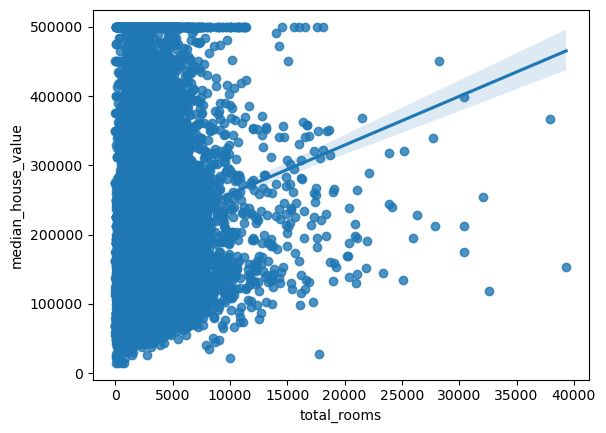

In [29]:
sns.regplot(x="total_rooms",
                    y="median_house_value",
                    data=cali_cleaned)

<Axes: xlabel='avg_room', ylabel='median_house_value'>

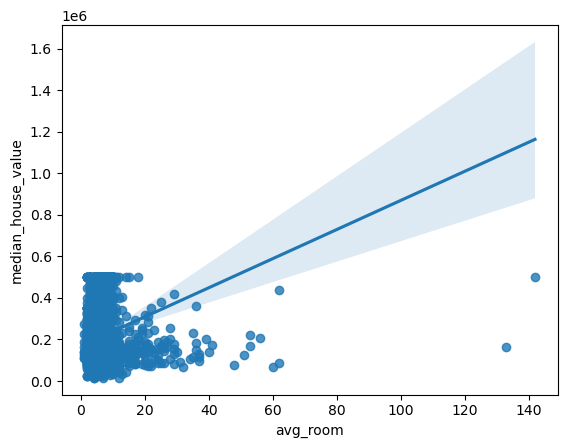

In [34]:
sns.regplot(x="avg_room",
                    y="median_house_value",
                    data=cali_cleaned)

<Axes: xlabel='avg_room', ylabel='median_house_value'>

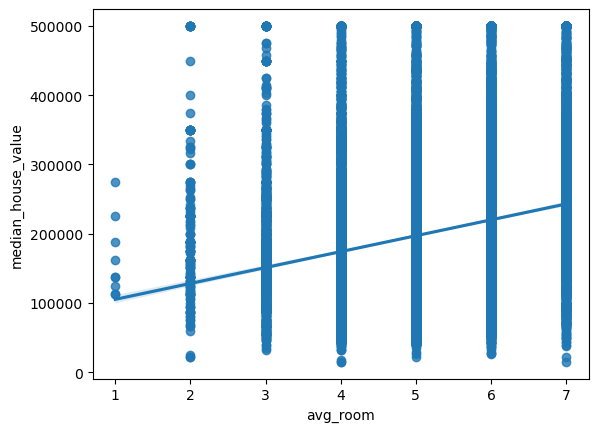

In [9]:
sns.regplot(x="avg_room",
                    y="median_house_value",
                    data=excali)

In [10]:
#Modelling and finding training and testing scores of regression model of average rooms less than 8 and median house value
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

X = excali[['avg_room']] #setting explanatory variables
Y = excali['median_house_value']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42) 
linear = LinearRegression(fit_intercept=True)
linear.fit(X_train,Y_train)
training_score = linear.score(X, Y) # calculate rsq for the training set
preds_linear = linear.predict(X_test) 
rsquared_linear = r2_score(Y_test,preds_linear) 

print("Correlation score is",np.round(np.sqrt(training_score), 3))
print("Coefficients are",np.round(linear.coef_, 3))
print("Intercept is",np.round(linear.intercept_,3))
print("Training score is",np.round(training_score, 3))
print("Testing score is",np.round(rsquared_linear, 3))

Correlation score is 0.229
Coefficients are [22619.115]
Intercept is 84079.691
Training score is 0.052
Testing score is 0.059
